# Initial Look At the Data

We can download data for a particular police authroity from the `data.police.uk` website.

https://data.police.uk/data/

For example, download the data for the Nottinghamshire area for the December 2018 to December 2018 period (i.e. just for December 2018).

From the [homepage](../) of this notebook environment, click on the `Upload` button and upload the zip file you have just downloaded from the data.police.uk website.

In [1]:
#List the files in the current directory - you should see the zip file you uploaded
!ls

ad3a89c1b0c17604f60d6ac8b5cf86cf6cce0540.zip  LICENSE	 Untitled.ipynb
binder					      README.md


In [2]:
#Unzip the zip file
#It should unzip a CSV file into a newly created folder
!unzip ad3a89c1b0c17604f60d6ac8b5cf86cf6cce0540.zip

Archive:  ad3a89c1b0c17604f60d6ac8b5cf86cf6cce0540.zip
  inflating: 2018-12/2018-12-nottinghamshire-street.csv  


In [3]:
#Look to check the folder is there...
!ls

2018-12					      binder   README.md
ad3a89c1b0c17604f60d6ac8b5cf86cf6cce0540.zip  LICENSE  Untitled.ipynb


In [4]:
#Look inside the folder
!ls 2018-12

2018-12-nottinghamshire-street.csv


## Preview the Data

We can load the data into a dataframe and preview what's there:

In [5]:
#pandas is a Python package for working with tabular data
#It has nothing to do with police cars!
import pandas as pd

#Read the data file in to a dataframe called: df
df = pd.read_csv('2018-12/2018-12-nottinghamshire-street.csv')

#The .head() method shows the first few rows of a dataframe
# .head(20) will preview the first 20 rows etc
df.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,1d1ff84e849e658f91f33ee70151dcb99ecdb8cc6c210d...,2018-12,Nottinghamshire Police,Nottinghamshire Police,-1.426980,53.005407,On or near The Walk,E01019446,Amber Valley 015A,Violence and sexual offences,Under investigation,NaN
1,NaN,2018-12,Nottinghamshire Police,Nottinghamshire Police,-1.251694,53.141619,On or near Hardwick Close,E01027979,Ashfield 001A,Anti-social behaviour,NaN,NaN
2,d6dc982cf42d35157092da89eddd50bb11f09e8266962c...,2018-12,Nottinghamshire Police,Nottinghamshire Police,-1.269785,53.143259,On or near Legion Drive,E01027979,Ashfield 001A,Criminal damage and arson,Investigation complete; no suspect identified,NaN
3,8340cd179ea3825d0195ac406be3706402bd4c13ca7a7e...,2018-12,Nottinghamshire Police,Nottinghamshire Police,-1.252344,53.142917,On or near Moorland Close,E01027979,Ashfield 001A,Criminal damage and arson,Under investigation,NaN
4,540890893d93e852f10805b6a9229b1ac8d13db5f32763...,2018-12,Nottinghamshire Police,Nottinghamshire Police,-1.253677,53.141056,On or near Petrol Station,E01027979,Ashfield 001A,Other theft,Investigation complete; no suspect identified,NaN


We notice that there are *latitude* and *longitude* columns in there.

We can use those columns to create "geographical things" that we can work with as geographical points.

In [18]:
#It's good to crib from documentation
#https://geopandas.readthedocs.io/en/latest/gallery/create_geopandas_from_pandas.html

#This just makes sure when we create any plots we can see them inline in the notebook
%matplotlib inline

#egopandas provides us with a dataframe type that can also cope with geometrical datatypes
import geopandas
#Shapely is another Python package that helps us work with geometrical things
#A Point is exactly that...
from shapely.geometry import Point

#To create a Point, we need Longitude,Latidude pairs
#Create a temporary column that joins data from the longitude and latitude columns as a pair of values
df['Coordinates'] = list(zip(df['Longitude'], df['Latitude']))
#Then cast the things in that column to a geometical Point datatype
df['Coordinates'] = df['Coordinates'].apply(Point)

Now we can look at our geopandas dataframe:

In [21]:
#A geopandas dataframe expects one column to relate to geometrical things: tell it which column
gdf = geopandas.GeoDataFrame(df, geometry='Coordinates')
#We can get rid of the latitude and longitude columns
gdf.drop(columns=['Longitude', 'Latitude'], inplace=True)

#Preview the first few rows of the geodataframe
gdf.head()

,Crime ID,Month,Reported by,Falls within,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,Coordinates
0,1d1ff84e849e658f91f33ee70151dcb99ecdb8cc6c210d...,2018-12,Nottinghamshire Police,Nottinghamshire Police,On or near The Walk,E01019446,Amber Valley 015A,Violence and sexual offences,Under investigation,NaN,POINT (-1.42698 53.005407)
1,NaN,2018-12,Nottinghamshire Police,Nottinghamshire Police,On or near Hardwick Close,E01027979,Ashfield 001A,Anti-social behaviour,NaN,NaN,POINT (-1.251694 53.14161899999999)
2,d6dc982cf42d35157092da89eddd50bb11f09e8266962c...,2018-12,Nottinghamshire Police,Nottinghamshire Police,On or near Legion Drive,E01027979,Ashfield 001A,Criminal damage and arson,Investigation complete; no suspect identified,NaN,POINT (-1.269785 53.14325899999999)
3,8340cd179ea3825d0195ac406be3706402bd4c13ca7a7e...,2018-12,Nottinghamshire Police,Nottinghamshire Police,On or near Moorland Close,E01027979,Ashfield 001A,Criminal damage and arson,Under investigation,NaN,POINT (-1.252344 53.142917)
4,540890893d93e852f10805b6a9229b1ac8d13db5f32763...,2018-12,Nottinghamshire Police,Nottinghamshire Police,On or near Petrol Station,E01027979,Ashfield 001A,Other theft,Investigation complete; no suspect identified,NaN,POINT (-1.253677 53.14105600000001)


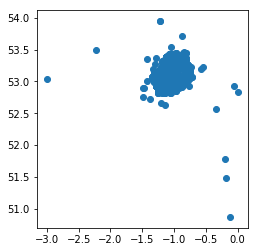

In [23]:
#We can crudely plot the points
gdf.plot();

Hmmm... it looks like there may be some outliers... We'll worry about those later....

## Plotting Boundaries

If we poke around the police data website, we also see an area that has boundaries...

https://data.police.uk/data/boundaries/

Let's have a rummage around inside them...

### Force Boundaries

In [ ]:
!wget https://data.police.uk/data/boundaries/force_kmls.zip